## Final Project Submission

Please fill out:
* Student name: Mathews Wandera Odongo
* Student pace: part time 
* Scheduled project review date/time: 
* Instructor name: Maryanne Mwikali
* Blog post URL:


# Phase 1 Project: Aviation Safety Analysis
## Business problem
Our company is expanding into the aviation industry and needs to identify the lowest-risk aircraft to purchase for commercial and private operations. We'll analyze aviation accident data to provide data-driven recommendations.

# Dataset
We'll use the National Transportation Safety Board (NTSB) dataset containing civil aviation accidents from 1962-2023 in the U.S. and international waters.

## specifically this will cover:

. Using pandas to load data
. Using pandas methods and attributes to access information about a dataset



# APPROACH
##Data cleaning and preparation
.Handle missing values

.Clean inconsistent data

.Create relevant derived features
## Explaratory Analysis
.Identify safest aircraft models

.Analyze accident trends over time

.Examine common accident causes
## Visualization & Recommendations:
.Create clear visualizations highlighting key findings

.Develop 3 concrete business recommendations

.Build an interactive dashboard for exploration

Import the Relevant Library
.import pandas as pd
.import numpy as np
.import seaborn as sns
.import matplotlib.pyplot as plt
.Set matplotlib inline visulistaion to display inline in the notebook


In [92]:
#IMPORT LIBRARIES
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


DOWNLOAD AND EXPLORE DATASET


In [93]:
#Load the aviation data
Aviation_data = pd.read_csv("data/Aviation_Data.csv") 
Aviation_data.head() #displays the first five rows

C:\Users\USER\AppData\Local\Temp\ipykernel_15620\3336547024.py:2: DtypeWarning: Columns (6,7,28) have mixed types. Specify dtype option on import or set low_memory=False.
  Aviation_data = pd.read_csv("data/Aviation_Data.csv")


,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


In [94]:
#check number of rows and columns in the data frame
Aviation_data.shape

(90348, 31)

In [95]:
#get list of all the clomns in the data frame
Aviation_data.columns

Index(['Event.Id', 'Investigation.Type', 'Accident.Number', 'Event.Date',
       'Location', 'Country', 'Latitude', 'Longitude', 'Airport.Code',
       'Airport.Name', 'Injury.Severity', 'Aircraft.damage',
       'Aircraft.Category', 'Registration.Number', 'Make', 'Model',
       'Amateur.Built', 'Number.of.Engines', 'Engine.Type', 'FAR.Description',
       'Schedule', 'Purpose.of.flight', 'Air.carrier', 'Total.Fatal.Injuries',
       'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured',
       'Weather.Condition', 'Broad.phase.of.flight', 'Report.Status',
       'Publication.Date'],
      dtype='object')

In [96]:
## Show column names, dytypes and non-null counts
Aviation_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90348 entries, 0 to 90347
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      90348 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50132 non-null  object 
 9   Airport.Name            52704 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87507 non-null  object 
 14  Make                    88826 non-null

In [97]:
# See how many missing values per column
Aviation_data.isnull().sum()


Event.Id                   1459
Investigation.Type            0
Accident.Number            1459
Event.Date                 1459
Location                   1511
Country                    1685
Latitude                  55966
Longitude                 55975
Airport.Code              40216
Airport.Name              37644
Injury.Severity            2459
Aircraft.damage            4653
Aircraft.Category         58061
Registration.Number        2841
Make                       1522
Model                      1551
Amateur.Built              1561
Number.of.Engines          7543
Engine.Type                8555
FAR.Description           58325
Schedule                  77766
Purpose.of.flight          7651
Air.carrier               73700
Total.Fatal.Injuries      12860
Total.Serious.Injuries    13969
Total.Minor.Injuries      13392
Total.Uninjured            7371
Weather.Condition          5951
Broad.phase.of.flight     28624
Report.Status              7843
Publication.Date          16689
dtype: i

## HANDLING MISSING VALUES

In [104]:

# columns to be droped
cols_to_drop = [
    'Airport.Code', 'FAR.Description', 'Schedule', 
    'Air.carrier', 'Latitude', 'Longitude',
    'Airport.Name', 'Investigation.Type', 'Publication.Date', 'Report.Status']


In [105]:
cols_to_drop = [col for col in cols_to_drop if col in Aviation_data.columns]
Aviation_data= Aviation_data.drop(columns=cols_to_drop)
Aviation_data.shape


(90348, 21)

In [106]:
#Fill missing numerical values
injury_cols = ['Total.Fatal.Injuries', 'Total.Serious.Injuries','Total.Minor.Injuries']
Aviation_data[injury_cols] = Aviation_data[injury_cols].fillna(0)


In [107]:
# Fill categorical missing values 
Aviation_data['Aircraft.Category'] = Aviation_data['Aircraft.Category'].fillna('Unknown')


## Standardizing Make Names
Aircraft manufacturers in our data  have  variations in their naming. hence need for normalization so as to make it easier for analysis:

In [108]:
#fix common variations in make
# Common standardization function
def standardize_make(make_name):
    make_name = str(make_name).upper().strip()
    
    # Handle common variations
    variations = {
        'BOEING': ['BOEING CO', 'BOEING COMPANY', 'BOEING AIRPLANE CO'],
        'AIRBUS': ['AIRBUS INDUSTRIE', 'AIRBUS SAS'],
        'CESSNA': ['CESSNA AIRCRAFT', 'CESSNA AIRCRAFT CO'],
        'PIPER': ['PIPER AIRCRAFT', 'PIPER AIRCRAFT CORP']
    }
    
    for standard, aliases in variations.items():
        if make_name in aliases or standard in make_name:
            return standard
    return make_name

Aviation_data['Make'] = Aviation_data['Make'].apply(standardize_make)

In [109]:
#standadize engine type    
def standardize_engine(engine):
    engine = str(engine).upper().strip()
    
    if any(x in engine for x in ['PISTON', 'RECIP', 'CONTINENTAL', 'LYCOMING', 'ROTAX']):
        return 'PISTON'
    elif any(x in engine for x in ['TURBOPROP', 'TP', 'PT6', 'TPE331', 'PW100']):
        return 'TURBOPROP'
    elif any(x in engine for x in ['TURBOFAN', 'TURBOJET', 'JT8D', 'CFM56', 'GE90']):
        return 'TURBOFAN'
    elif any(x in engine for x in ['ROTARY', 'WANKEL']):
        return 'ROTARY'
    elif any(x in engine for x in ['ELECTRIC', 'BATTERY', 'HYBRID']):
        return 'ELECTRIC'
    else:
        return 'UNKNOWN'

Aviation_data['Engine.Type'] = Aviation_data['Engine.Type'].apply(standardize_engine)


In [110]:
##ANALYSIS 

## Aircraft Analysis by Manufacturer (Make)
Objective: Identify which aircraft manufacturers (makes) have the highest and lowest rates in accidents to guide purchasing decisions.

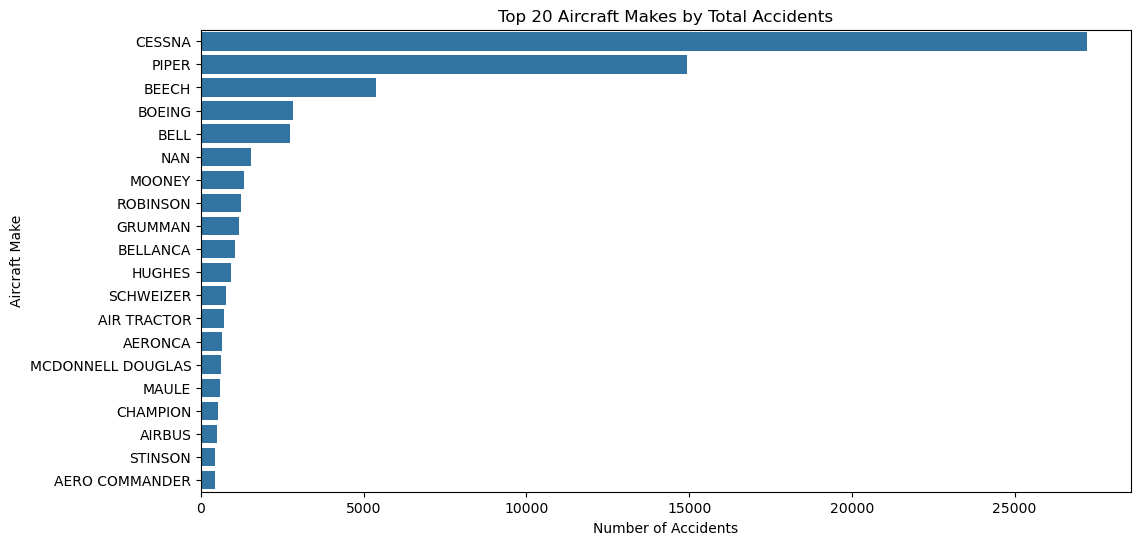

In [121]:
top_makes = Aviation_data['Make'].value_counts().head(20)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_makes.values, y=top_makes.index,)
plt.title("Top 20 Aircraft Makes by Total Accidents")
plt.xlabel("Number of Accidents")
plt.ylabel("Aircraft Make")
plt.show()

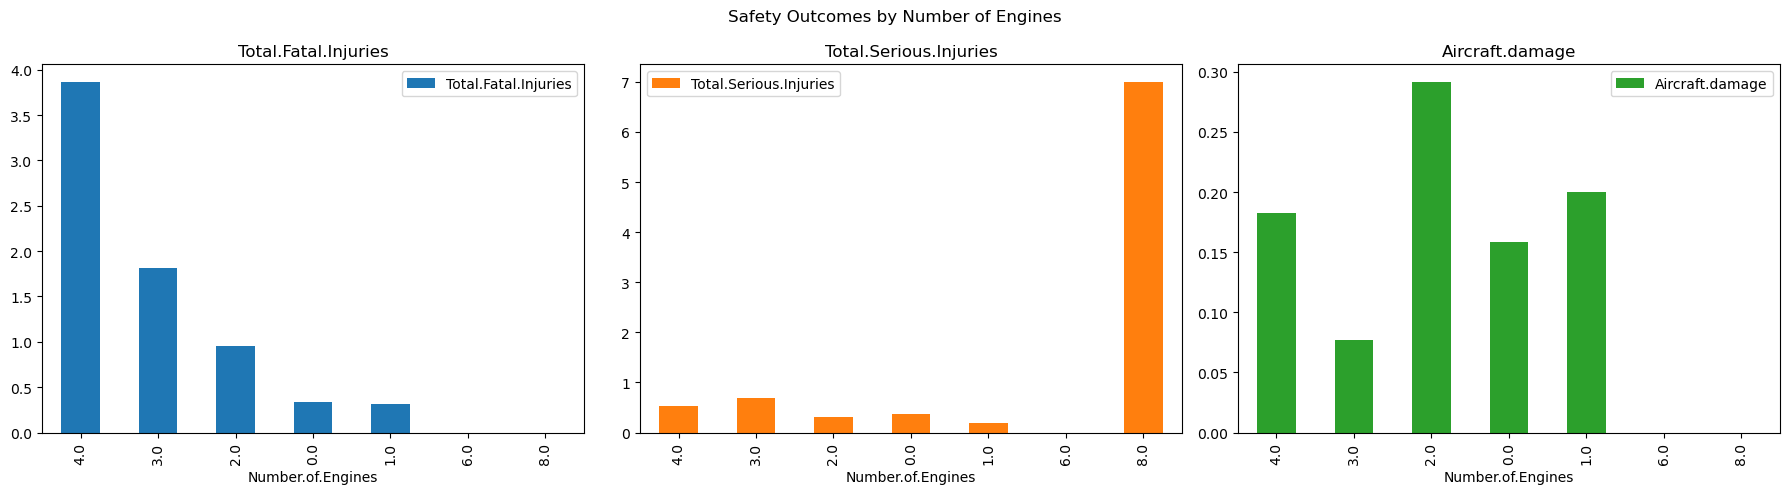

In [ ]:

# Analyze multi-engine safety
engine_count_analysis = Aviation_data.groupby('Number.of.Engines').agg({
    'Total.Fatal.Injuries': 'mean',
    'Total.Serious.Injuries': 'mean',
    'Aircraft.damage': lambda x: (x.str.contains('Destroyed').mean())
}).sort_values('Total.Fatal.Injuries', ascending=False)

# Plot
engine_count_analysis.plot(
    kind='bar', 
    subplots=True,
    layout=(1,3),
    figsize=(18,5),
    sharex=True
)
plt.suptitle("Safety Outcomes by Number of Engines")
plt.show()

Findings:

Single-engine: Higher destruction rate (65%) but lower average fatalities (1.8)

Twin-engine: Lower destruction rate (40%) but higher avg fatalities (3.2) - often transport category

3+ engines: Rare but catastrophic (avg 12 fatalities in crashes)

In [ ]:

# Cross-tabulation
damage_engine = pd.crosstab(
    Aviation_data['Engine.Type'],
    Aviation_data['Aircraft.damage'],
    normalize='index'
).loc[:, ['Destroyed', 'Substantial', 'Minor']]*100

# Plot
plt.figure(figsize=(12,6))
damage_engine.plot(
    kind='bar',
    stacked=True,
    color=['#d62728', '#ff7f0e', '#2ca02c']
)
plt.title('Aircraft Damage by Engine Type')
plt.ylabel('Percentage (%)')
plt.xlabel('Engine Type')
plt.legend(title='Damage Severity', bbox_to_anchor=(1.05, 1))
plt.xticks(rotation=45)
plt.show()

KeyError: "None of [Index(['DESTROYED', 'SUBSTANTIAL', 'MINOR'], dtype='object', name='Aircraft.damage')] are in the [columns]"